In [1]:
import pandas as pd            # 数据处理
import matplotlib.pyplot as plt            # 作图
import matplotlib            #指定默认字体
import jieba            # 中文分词工具
import re            # 正则表达式
from collections import Counter            # 统计数量
from pyecharts import *                       # 可视化渲染图片

In [2]:
df  = pd.read_excel('优雅-哔哩哔哩_Bilibili_cleaned.xlsx')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901 entries, 0 to 900
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   视频标题    901 non-null    object 
 1   总播放数    901 non-null    int64  
 2   总弹幕数    901 non-null    int64  
 3   发布时间    901 non-null    object 
 4   视频时长    409 non-null    float64
 5   点赞数     901 non-null    int64  
 6   投币数     901 non-null    int64  
 7   收藏数     901 non-null    int64  
 8   视频介绍    779 non-null    object 
 9   标签      901 non-null    object 
 10  评论数     653 non-null    float64
 11  发布者     648 non-null    object 
 12  页面网址    901 non-null    object 
 13  转发数     722 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 98.7+ KB


<font face="微软雅黑" size=5 color=＃1E90FF >运用describe()总体分析数值型数据列

In [4]:
df.describe()

,总播放数,总弹幕数,视频时长,点赞数,投币数,收藏数,评论数,转发数
count,9.010000e+02,901.000000,409.000000,9.010000e+02,901.000000,901.000000,653.000000,722.000000
mean,4.333991e+05,333.475028,117.271394,2.682194e+04,1720.376249,6095.106548,195.774885,1372.419668
std,8.868914e+05,1099.205550,118.835515,6.671309e+04,5495.089819,14687.149474,441.589287,4276.553060
min,1.170000e+02,0.000000,7.000000,4.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.300000e+04,20.000000,30.000000,2.242000e+03,50.000000,312.000000,0.000000,35.250000
50%,1.640000e+05,72.000000,86.000000,7.111000e+03,197.000000,1500.000000,59.000000,175.000000
75%,4.300000e+05,247.000000,175.000000,2.300000e+04,896.000000,5185.000000,193.000000,804.500000
max,9.859000e+06,20000.000000,930.000000,1.108000e+06,68000.000000,248000.000000,5007.000000,73000.000000


<font face="微软雅黑" size=4 color=#A52A2A > 由此可见，以“优雅”为主题的视频总播放数、视频时长、点赞数、投币数、收藏数、评论数、转发数的中位数分别为164000次,72条，86秒，7111个，197枚，1500次,59条，175次。这说明以“优雅”为主题的视频以短视频为主，中位数16.4万的播放量下不到1万的点赞，不破百的弹幕数和评论数，说明观看此类视频群众的观看方式多为快餐式，这也符合当下短视频的特征。

<font face="微软雅黑" size=5 color=＃1E90FF > 以“优雅”为主题的视频发布时间分析

In [5]:
df.head()

,视频标题,总播放数,总弹幕数,发布时间,视频时长,点赞数,投币数,收藏数,视频介绍,标签,评论数,发布者,页面网址,转发数
0,“ 优雅，太优雅了! ”,3931000,146,2022-07-21 17:36:52,181.0,29000,5053,89000,-,This Is It 搞笑新星训练营 非自然死亡\n ...,49.0,男友糖尿病我蛀牙,https://www.bilibili.com/video/BV1CG411n7p3/?s...,97.0
1,震惊！女大学生打招呼竟然这么优雅！！！,7686000,951,2022-05-02 22:29:21,NaN,513000,3898,47000,-,校园整活王 生活\n 搞笑\n 优雅\n ...,0.0,君君昂昂君,https://www.bilibili.com/video/BV15B4y117PF/?s...,10000.0
2,“优雅...永不过时 ！ ！”,478000,146,2022-11-01 18:39:00,185.0,8130,1176,10000,-,搞笑研究所 人类迷惑行为\n 万恶之源\n ...,NaN,银桑的万视屋,https://www.bilibili.com/video/BV16P4y1m7cB/?s...,NaN
3,“优雅，实在是太优雅了”,2901000,2995,2022-09-09 12:05:00,163.0,83000,35000,87000,简介说得对,搞笑研究所 生活\n 搞笑\n 全程高能\n ...,NaN,NaN,https://www.bilibili.com/video/BV1N14y1e7Dm/?s...,NaN
4,谁说弹钢琴可以变优雅，在弹一种新的琴,1502000,1131,2023-01-02 22:20:00,NaN,100000,2139,33000,谁说弹钢琴可以变优雅，在弹一种新的琴,有哪些娱乐高能名场面 演奏\n 音乐\n 演...,641.0,娱圈小奶茶,https://www.bilibili.com/video/BV1dG4y1m7UY/?s...,5116.0


In [3]:
df = df[pd.notnull(df['发布时间'])]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 0 to 900
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   视频标题    901 non-null    object 
 1   总播放数    901 non-null    int64  
 2   总弹幕数    901 non-null    int64  
 3   发布时间    901 non-null    object 
 4   视频时长    409 non-null    float64
 5   点赞数     901 non-null    int64  
 6   投币数     901 non-null    int64  
 7   收藏数     901 non-null    int64  
 8   视频介绍    779 non-null    object 
 9   标签      901 non-null    object 
 10  评论数     653 non-null    float64
 11  发布者     648 non-null    object 
 12  页面网址    901 non-null    object 
 13  转发数     722 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 105.6+ KB


<font face="微软雅黑" size=5 color=＃1E90FF >按发布时间降序排列，查看最新发布的视频

In [4]:
df1 = df.copy()

In [5]:
df1.sort_values(by='发布时间', axis=0, ascending=False, inplace=True)

In [10]:
df1.head(10)

,视频标题,总播放数,总弹幕数,发布时间,视频时长,点赞数,投币数,收藏数,视频介绍,标签,评论数,发布者,页面网址,转发数
513,【JWSAM】我愿称之为都市搞钱人衣柜的天花板，简约优雅又气场十足,338,0,2023-01-18 15:27:00,NaN,26,0,17,BGM—All of You,时装周\n 秀场\n 穿搭\n ...,NaN,是萝卜叶啊,https://www.bilibili.com/video/BV1zy4y1R7pt/?s...,NaN
661,魈：优雅永不过时,1337,7,2023-01-18 13:48:00,24.0,271,10,6,魈：优雅永不过时,原神UP主激励计划 原神\n 搞笑\n ...,7.0,NaN,https://www.bilibili.com/video/BV1MR4y1a7GL/?s...,1.0
607,搞笑女，优雅嘛~,310,0,2023-01-17 22:32:14,NaN,4,0,0,NaN,搞笑研究所 搞笑\n 生活\n 搞笑\n ...,0.0,哔哩哔哩吖水,https://www.bilibili.com/video/BV1uY411R7KZ/?s...,1.0
579,“优雅永不过时”,2420,0,2023-01-17 21:09:13,NaN,178,4,11,-,音乐分享官 耳机\n 乐器\n 翻唱\...,NaN,NaN,https://www.bilibili.com/video/BV1Jd4y1V7kY/?s...,NaN
315,我永远爱复古小套装！！我要把复古优雅穿到老！,2004,0,2023-01-17 21:02:57,128.0,47,2,26,我永远爱复古小套装！！复古优雅穿到老！,穿搭\n 服饰\n 时尚\n ...,4.0,张美伢啊,https://www.bilibili.com/video/BV12K411r7QB/?s...,0.0
418,【153/42】红色开运新年穿搭，优雅气质向/单品推荐,3714,83,2023-01-17 18:30:00,NaN,203,44,31,提前和大家说一声新年快乐，这一期想和大家分享八组新年穿搭。不过新年穿搭我也并不想穿得一身大红...,不一样的新LOOK 购物分享\n 种草\n ...,NaN,Maia嘛呀,https://www.bilibili.com/video/BV1pD4y1H7oc/?s...,NaN
621,优雅永不过时 你的完美恋人,1062,0,2023-01-17 15:09:31,12.0,48,0,3,-,泡沫 (男声版) 过年要红包就跳这个舞 舞蹈\n 舞蹈综合\...,0.0,i杂鱼川哦,https://www.bilibili.com/video/BV1uW4y1G799/?s...,1.0
724,拳击的尽头是艺术，暴力而不失优雅,15000,10,2023-01-17 15:05:03,NaN,2279,68,443,-,Умри если меня не любишь 拳击\n ...,0.0,格斗阿祖,https://www.bilibili.com/video/BV1VK411k757/?s...,75.0
763,优雅蝴蝶高跟鞋,1314,0,2023-01-17 11:20:00,NaN,152,20,90,过年画个小高跟吧，优雅蝴蝶高跟鞋，希望喜欢。每次更新最痛苦的就是审核，只是想给大家展示美好的...,绘画神反转 高跟鞋\n 绘画\n 生活...,0.0,MoonlitZJW,https://www.bilibili.com/video/BV14d4y1V7v1/?s...,2.0
625,过你那叫一个优雅【加兰21-22赛季高光混剪】,832,8,2023-01-17 10:37:17,171.0,50,7,24,"BGM：NOTD, Shy Martin - Keep You Mine\n\n补档",小提琴\n 篮球\n 演奏\n ...,NaN,卡梅罗铁瓜,https://www.bilibili.com/video/BV1814y1M73M/?s...,NaN


<font face="微软雅黑" size=4 color=#A52A2A >按时间倒序，发现最后一个视频上传于2023年1月18日下午15:27:00，发现还是有重复数据，这是因为之前的去重是依照所有列相同的原则，所以回到之前的data cleaning以修改规则：去重应该优先考虑那些全部采集到的字段

<font face="微软雅黑" size=4 color=#A52A2A >修改规则后，前两条还是重复，由于同一个URL唯一指定一张图片或音频、视频、页面，所以，尝试drop_duplicates()中subset属性只用'页面网址'

<font face="微软雅黑" size=4 color=#A52A2A >第三次修改规则后没问题了

<font face="微软雅黑" size=5 color=＃1E90FF >统计各年份发布的视频数量

In [6]:
df1['发布时间'] = df1['发布时间'].str[0:4]
df1

,视频标题,总播放数,总弹幕数,发布时间,视频时长,点赞数,投币数,收藏数,视频介绍,标签,评论数,发布者,页面网址,转发数
513,【JWSAM】我愿称之为都市搞钱人衣柜的天花板，简约优雅又气场十足,338,0,2023,NaN,26,0,17,BGM—All of You,时装周\n 秀场\n 穿搭\n ...,NaN,是萝卜叶啊,https://www.bilibili.com/video/BV1zy4y1R7pt/?s...,NaN
661,魈：优雅永不过时,1337,7,2023,24.0,271,10,6,魈：优雅永不过时,原神UP主激励计划 原神\n 搞笑\n ...,7.0,NaN,https://www.bilibili.com/video/BV1MR4y1a7GL/?s...,1.0
607,搞笑女，优雅嘛~,310,0,2023,NaN,4,0,0,NaN,搞笑研究所 搞笑\n 生活\n 搞笑\n ...,0.0,哔哩哔哩吖水,https://www.bilibili.com/video/BV1uY411R7KZ/?s...,1.0
579,“优雅永不过时”,2420,0,2023,NaN,178,4,11,-,音乐分享官 耳机\n 乐器\n 翻唱\...,NaN,NaN,https://www.bilibili.com/video/BV1Jd4y1V7kY/?s...,NaN
315,我永远爱复古小套装！！我要把复古优雅穿到老！,2004,0,2023,128.0,47,2,26,我永远爱复古小套装！！复古优雅穿到老！,穿搭\n 服饰\n 时尚\n ...,4.0,张美伢啊,https://www.bilibili.com/video/BV12K411r7QB/?s...,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
551,黄家和裴家的优雅名媛参加酒会,448000,482,2018,NaN,5872,356,7670,推特\n热推热推！！！,黄美英\n 少女时代\n Korea相关\n...,NaN,Sosi_gg,https://www.bilibili.com/video/BV1AW411R7Fc/?s...,NaN
853,一位福建朋友优雅的描述大雨,291000,50,2018,NaN,5185,179,1996,微博\n哈哈哈哈哈哈哈,搞笑\n 生活\n 搞笑\n 哈...,NaN,杯君淮,https://www.bilibili.com/video/BV1ts411H76d/?s...,NaN
360,【高颜值】吉永小百合的14岁至73岁电影回顾／女神完美诠释如何美丽优雅的老去,131000,474,2018,235.0,2024,1133,3743,BGM——July《My Soul》,My Soul 影视\n 影视剪辑\n 盛世美颜...,247.0,天涯思心常为君,https://www.bilibili.com/video/BV1hW411G7b4/?s...,1079.0
836,压力面前保持优雅（杰罗姆）,1379000,679,2018,NaN,18000,2088,9509,希望你们可以喜欢这期视频，欢迎加入禽兽malegebi粉丝群，群聊号码：515188653，...,哥谭\n 影视\n 影视剪辑\n ...,564.0,lucas___________,https://www.bilibili.com/video/BV1XW411g7kX/?s...,6776.0


In [12]:
df1['发布时间'].unique()

array(['2023', '2022', '2021', '2020', '2019', '2018', '2017'],
      dtype=object)

In [9]:
pd.DataFrame(df1['发布时间'].value_counts())

,发布时间
2022,658
2021,103
2023,84
2020,42
2019,7
2018,6
2017,1


<font face="微软雅黑" size=4 color=#A52A2A >可见，作为2022年的年度弹幕，以优雅为主题的视频的确在2022年盛行，截止2023年1月18日21:49:25，2023已发布84部视频，作为2022年度弹幕，目前仍处于流行期

<font face="微软雅黑" size=5 color=＃1E90FF >视频标题、标签词云分析

<font face="微软雅黑" size=5 color=＃1E90FF >视频标签词云分析

In [10]:
strings = ''
for item in df['标签']:
    strings += item
    strings += " "

In [11]:
strings

"This Is It     搞笑新星训练营    非自然死亡\n             人类迷惑行为\n             万恶之源\n             是在下输了\n             搞笑\n             必剪创作\n             生活\n          搞笑\n          优雅，太优雅了\n             人类巅峰行为\n             20s夺走你的卧槽\n             搞笑新星训练营8.0 校园整活王    生活\n          搞笑\n          优雅\n             女大学生\n             封校\n             校园整活王2.0 搞笑研究所    人类迷惑行为\n             万恶之源\n             是在下输了\n             搞笑\n             生活\n          搞笑\n          优雅\n             搞笑视频\n             逗比\n             全程高能\n             搞笑研究所9.0\n             沙雕\n             名场面 搞笑研究所    生活\n          搞笑\n          全程高能\n             优雅\n             搞笑研究所7.0\n             搞笑研究所6.0\n             搞笑研究所5.0\n             搞笑研究所8.0\n             文案\n             名场面\n             段子\n             监控 有哪些娱乐高能名场面    演奏\n             音乐\n          演奏\n          音乐\n             优雅\n             美女\n             弹钢琴\n             星动安利大作战 无限搞笑公司    人类迷惑行为\n             搞笑\n             生活\n          搞笑\n

In [22]:
type(strings)

str

In [12]:
# 先统计一下标签词频
words = strings.split()
counts = {}
for word in words:
    counts[word] = counts.get(word,0) + 1
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True) 
for i in range(10):
    word, count = items[i]
    print("{0:<10}{1:>5}".format(word, count))

搞笑          575
生活          443
优雅          377
娱乐          136
必剪创作        117
全程高能        117
游戏          115
时尚          110
影视剪辑        106
沙雕          103


In [25]:
words

['This',
 'Is',
 'It',
 '搞笑新星训练营',
 '非自然死亡',
 '人类迷惑行为',
 '万恶之源',
 '是在下输了',
 '搞笑',
 '必剪创作',
 '生活',
 '搞笑',
 '优雅，太优雅了',
 '人类巅峰行为',
 '20s夺走你的卧槽',
 '搞笑新星训练营8.0',
 '校园整活王',
 '生活',
 '搞笑',
 '优雅',
 '女大学生',
 '封校',
 '校园整活王2.0',
 '搞笑研究所',
 '人类迷惑行为',
 '万恶之源',
 '是在下输了',
 '搞笑',
 '生活',
 '搞笑',
 '优雅',
 '搞笑视频',
 '逗比',
 '全程高能',
 '搞笑研究所9.0',
 '沙雕',
 '名场面',
 '搞笑研究所',
 '生活',
 '搞笑',
 '全程高能',
 '优雅',
 '搞笑研究所7.0',
 '搞笑研究所6.0',
 '搞笑研究所5.0',
 '搞笑研究所8.0',
 '文案',
 '名场面',
 '段子',
 '监控',
 '有哪些娱乐高能名场面',
 '演奏',
 '音乐',
 '演奏',
 '音乐',
 '优雅',
 '美女',
 '弹钢琴',
 '星动安利大作战',
 '无限搞笑公司',
 '人类迷惑行为',
 '搞笑',
 '生活',
 '搞笑',
 '优雅',
 '搞笑视频',
 '全程高能',
 '沙雕视频',
 '无限搞笑公司发年终奖啦',
 '万恶之源',
 '搞笑',
 '生活',
 '搞笑',
 '逗比',
 '高能',
 '吐槽',
 '迷惑行为',
 'Shadow',
 'Of',
 'The',
 'Sun',
 '搞笑',
 '生活',
 '搞笑',
 '逗比',
 '记录',
 'Young',
 'And',
 'Beautiful',
 '明星安利官',
 '舞台剧',
 '芭蕾',
 '娱乐',
 '粉丝创作',
 '舞蹈',
 '芭蕾舞',
 '美女',
 '女神',
 '混剪',
 '艺术',
 '跟着UP主创作吧（第五期）',
 '美学',
 '时装周',
 '秀场',
 '穿搭',
 '服饰',
 '时尚',
 '时尚潮流',
 '时装秀',
 '复古',
 '法式',
 'Lemaire',
 '伤不起',
 '原神UP主激励计划',


<font face="微软雅黑" size=4 color=#A52A2A >words以list的形式呈现，可以看到，分词方法有缺陷，它将含有' '的外文标签分为数个单词，如'This Is It'，'Умри если меня не любишь'，抑或将含有' '的中外文混合标签分为多个，如'溯 (Reverse) feat. 马吟吟'，虽然从严格意义上说这并非视频标签而是视频标签词汇，但这些含有' '的标签毕竟是少数，对结论的影响并不大

In [13]:
keys, values = Counter(words).keys(), Counter(words).values()
wordcloud = WordCloud('视频标签词云', width=900, height=620)
wordcloud.add("视频标签词汇词频", list(keys), list(values), word_size_range=[10, 100])
wordcloud

<font face="微软雅黑" size=5 color=＃1E90FF >视频标题词云分析

In [14]:
df['视频标题'].tail(10)

891                        13秒心动♪温柔优雅的妈妈大人
892                             蜘蛛侠：优雅永不过时
893                      被当众嘲讽？3招优雅回怼，超解气！
894                   一个动作尽显她的优雅，优雅是刻到骨子里的
895                                优雅 太优雅了
896                                 优雅永不过时
897    ＃羽生结弦＃他踩着冰刀走路那范儿真的不亚于超模在T台上，太优雅有气势了
898                       优雅钢琴师，从面无表情到逐渐黑化
899                                 优雅永不过时
900                          优雅永不过时  复仇者联盟
Name: 视频标题, dtype: object

In [15]:
df['视频标题'].dtype

dtype('O')

In [16]:
strings1 = ''
for item in df['视频标题']:
    strings1 += item
    strings1 += " "
strings1

'“ 优雅，太优雅了! ” 震惊！女大学生打招呼竟然这么优雅！！！ “优雅...永不过时 ！ ！” “优雅，实在是太优雅了” 谁说弹钢琴可以变优雅，在弹一种新的琴 “优雅，永不过时！” “优雅，永不过时！！” 优雅，太优雅了 卧槽！真的有人连摔倒都美到极致！这才是举手投足满是优雅的顶级仪态！宿命感拉满的be美学！ 【法式极简风】 “诠释什么叫漫不经心的优雅” 优雅，太优雅了 优雅  永不过时 优雅  永不过时 她是有优雅牛逼症吧！这部剧里她的造型真的绝美！步步生莲不过如此！ 优雅，太优雅了！🤠#骚操作#优雅永不过时#整活 “优雅永不过时！” 优雅，实在是太优雅了！ “优雅永不过时...” 优雅～太优雅了！ 优雅，实在是太优雅了 ！ “优雅，永不过时！！” 优雅永不过时！那些优雅瞬间 生来优雅，气质天成 优雅，太优雅了！ 高贵，可爱，美却不做作，优雅顶级优雅 ⚡优雅永不过时⚡ 爱死这优雅美艳又嚣张的高级感！ “笑死，优雅可不是装腔作势” 要什么疯批美人，黑色玫瑰才香！【极致优雅踩点】 优雅永不过时 优 雅 至 极 优雅，实在是太优雅了 [男铜篇]如 何 优 雅 做 0 “优雅…永不过时！！！” 给人一种高贵 优雅 清纯没有传染的感觉 优雅，永不过时！ 优雅，实在是太优雅了 “老师我啊，以前当S级英雄时也是很优雅的！！” 【变速】优雅，太优雅了 优雅，实在是太优雅了！ 强大且优雅 如果生活没有了优雅，那将是一场悲剧！ 优雅，实在是太优雅了 “优雅，实在是太优雅了” 美式优雅 “优雅永不过时......” 谁说弹钢琴可以变优雅，钢琴在他这会抑郁的 “优雅永不过时！” "优雅，简直是太优雅了！" 篮球，也需要时刻注意优雅！ 优雅，太优雅了！ “优雅永不过时，身材无懈可击！！” 优雅 永不过时 请收下这份老死的优雅，沉稳的浪漫  ‖ Ralph Lauren 1993~2022 秀场混剪 优雅，永不过时 这就是优雅的杀伤力吧？大小姐驾到既视感！俏皮又高贵！【高跟鞋】【踩点】 优雅妖姬 弟弟的疯狂在于毁灭，哥哥的疯狂在于优雅！ 教你如何优雅的吃东西 优雅，永不过时！ 答应我，一定要一直优雅下去…… 【Pamella Roland】性感不魅惑，优雅不做作～ 优雅...实在是太优雅了！！！ 优雅  永不过时 优雅，实在是太优雅了。 优雅永不过时  甜御风你能顶住吗 瑜伽小姐姐，看着

<font face="微软雅黑" size=4 color=#A52A2A >视频标题中的文字主要由中文和标点符号组成，还有少量的数字、外文、特殊符号如'⚡'，因此，本文提取所有的中文词汇进行分析

In [18]:
strings1 = ''.join(re.findall(r'[\u4e00-\u9fa5]', strings1))
strings1

'优雅太优雅了震惊女大学生打招呼竟然这么优雅优雅永不过时优雅实在是太优雅了谁说弹钢琴可以变优雅在弹一种新的琴优雅永不过时优雅永不过时优雅太优雅了卧槽真的有人连摔倒都美到极致这才是举手投足满是优雅的顶级仪态宿命感拉满的美学法式极简风诠释什么叫漫不经心的优雅优雅太优雅了优雅永不过时优雅永不过时她是有优雅牛逼症吧这部剧里她的造型真的绝美步步生莲不过如此优雅太优雅了骚操作优雅永不过时整活优雅永不过时优雅实在是太优雅了优雅永不过时优雅太优雅了优雅实在是太优雅了优雅永不过时优雅永不过时那些优雅瞬间生来优雅气质天成优雅太优雅了高贵可爱美却不做作优雅顶级优雅优雅永不过时爱死这优雅美艳又嚣张的高级感笑死优雅可不是装腔作势要什么疯批美人黑色玫瑰才香极致优雅踩点优雅永不过时优雅至极优雅实在是太优雅了男铜篇如何优雅做优雅永不过时给人一种高贵优雅清纯没有传染的感觉优雅永不过时优雅实在是太优雅了老师我啊以前当级英雄时也是很优雅的变速优雅太优雅了优雅实在是太优雅了强大且优雅如果生活没有了优雅那将是一场悲剧优雅实在是太优雅了优雅实在是太优雅了美式优雅优雅永不过时谁说弹钢琴可以变优雅钢琴在他这会抑郁的优雅永不过时优雅简直是太优雅了篮球也需要时刻注意优雅优雅太优雅了优雅永不过时身材无懈可击优雅永不过时请收下这份老死的优雅沉稳的浪漫秀场混剪优雅永不过时这就是优雅的杀伤力吧大小姐驾到既视感俏皮又高贵高跟鞋踩点优雅妖姬弟弟的疯狂在于毁灭哥哥的疯狂在于优雅教你如何优雅的吃东西优雅永不过时答应我一定要一直优雅下去性感不魅惑优雅不做作优雅实在是太优雅了优雅永不过时优雅实在是太优雅了优雅永不过时甜御风你能顶住吗瑜伽小姐姐看着就比较优雅有些主角真优雅优雅永不过时优雅永不过时优雅实在是太优雅了来感受我们的优雅优雅这方面永不过时优雅永不过时优雅永不过时优雅永不过时身材无懈可击这才是真的优雅优雅永不过时优雅至极卧槽跳高优雅到这种程度也是真离谱绝了优雅永不过时谁说弹钢琴可以变优雅钢琴在他这会抑郁的有种脑干缺失的感觉搞笑视频四大优雅优雅实在是太优雅了优雅永不过时优雅永不过时全站最优雅的中指优雅实在是太优雅啦终于知道他为什么被称为香港演艺圈最具有贵族气质的男艺人了这是骨子里透着的优雅与自信张国荣优雅太优雅了优雅永不过时杰克船长的最高礼仪优雅与生俱来谁说高跟鞋就一定优雅优雅永不过时优雅永不过时优雅有点过时优雅太优雅了女铜篇如何优雅

In [20]:
words1  = jieba.lcut(strings1)
words1

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\g\AppData\Local\Temp\jieba.cache
Loading model cost 0.523 seconds.
Prefix dict has been built successfully.


['优雅',
 '太',
 '优雅',
 '了',
 '震惊',
 '女',
 '大学生',
 '打招呼',
 '竟然',
 '这么',
 '优雅',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '实在',
 '是',
 '太',
 '优雅',
 '了',
 '谁',
 '说',
 '弹钢琴',
 '可以',
 '变',
 '优雅',
 '在',
 '弹',
 '一种',
 '新',
 '的',
 '琴',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '太',
 '优雅',
 '了',
 '卧槽',
 '真的',
 '有人',
 '连',
 '摔倒',
 '都',
 '美到',
 '极致',
 '这才',
 '是',
 '举手投足',
 '满是',
 '优雅',
 '的',
 '顶级',
 '仪态',
 '宿命',
 '感拉满',
 '的',
 '美学',
 '法式',
 '极',
 '简风',
 '诠释',
 '什么',
 '叫',
 '漫不经心',
 '的',
 '优雅',
 '优雅',
 '太',
 '优雅',
 '了',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '永不',
 '过时',
 '她',
 '是',
 '有',
 '优雅',
 '牛逼症',
 '吧',
 '这部',
 '剧里',
 '她',
 '的',
 '造型',
 '真的',
 '绝美',
 '步步',
 '生莲',
 '不过如此',
 '优雅',
 '太',
 '优雅',
 '了',
 '骚',
 '操作',
 '优雅',
 '永不',
 '过时',
 '整活',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '实在',
 '是',
 '太',
 '优雅',
 '了',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '太',
 '优雅',
 '了',
 '优雅',
 '实在',
 '是',
 '太',
 '优雅',
 '了',
 '优雅',
 '永不',
 '过时',
 '优雅',
 '永不',
 '过时',
 '那些',
 '优雅',
 '瞬间',
 '生来',
 '优雅',
 '气质',
 '天成',
 '优雅',
 '太',
 '优雅',
 '了',
 '高贵',
 '可爱'

In [21]:
keys, values = Counter(words1).keys(), Counter(words1).values()
wordcloud = WordCloud('视频标题词云', width=900, height=620)
wordcloud.add("视频标题词汇词频", list(keys), list(values), word_size_range=[10, 100])
wordcloud

<font face="微软雅黑" size=4 color=#A52A2A >可见，视频标题中出现最多的中文词汇是'优雅'，此外'永不','过时'出现的频率也较高。没错，'优雅，永不过时'，2023年，请继续保持优雅

<font face="微软雅黑" size=5 color=＃1E90FF >机器学习：无监督学习-聚类

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 901 entries, 513 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   视频标题    901 non-null    object 
 1   总播放数    901 non-null    int64  
 2   总弹幕数    901 non-null    int64  
 3   发布时间    901 non-null    object 
 4   视频时长    409 non-null    float64
 5   点赞数     901 non-null    int64  
 6   投币数     901 non-null    int64  
 7   收藏数     901 non-null    int64  
 8   视频介绍    779 non-null    object 
 9   标签      901 non-null    object 
 10  评论数     653 non-null    float64
 11  发布者     648 non-null    object 
 12  页面网址    901 non-null    object 
 13  转发数     722 non-null    float64
dtypes: float64(3), int64(5), object(6)
memory usage: 105.6+ KB


In [25]:
df1[['发布时间']].head()

,发布时间
513,2023
661,2023
607,2023
579,2023
315,2023


In [8]:
analysis_data = df1[['视频标题' ,'总播放数', '总弹幕数', '点赞数', '投币数', '收藏数']].copy() # 选取我们需要的特征(列)
analysis_data.head(5)  

,视频标题,总播放数,总弹幕数,点赞数,投币数,收藏数
513,【JWSAM】我愿称之为都市搞钱人衣柜的天花板，简约优雅又气场十足,338,0,26,0,17
661,魈：优雅永不过时,1337,7,271,10,6
607,搞笑女，优雅嘛~,310,0,4,0,0
579,“优雅永不过时”,2420,0,178,4,11
315,我永远爱复古小套装！！我要把复古优雅穿到老！,2004,0,47,2,26


array([[<AxesSubplot:xlabel='总播放数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='投币数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='收藏数', ylabel='总播放数'>],
       [<AxesSubplot:xlabel='总播放数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='投币数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='收藏数', ylabel='总弹幕数'>],
       [<AxesSubplot:xlabel='总播放数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='投币数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='收藏数', ylabel='点赞数'>],
       [<AxesSubplot:xlabel='总播放数', ylabel='投币数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='投币数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='投币数'>,
        <AxesSubplot:xlabel='投币数', ylabel='投币数'>,
        <AxesSubplot:xlabel='

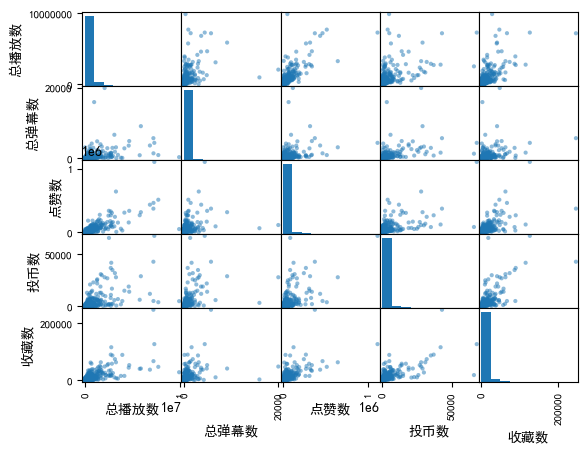

In [17]:
# 通过绘制特征散点图矩阵，观察每两种特征的区分度
matplotlib.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['font.family']='sans-serif'
pd.plotting.scatter_matrix(analysis_data, diagonal='hist')

<font face="微软雅黑" size=4 color=#A52A2A >未呈现明显的分离，先尝试分为2类

In [12]:
# 定义簇的个数为2，取后5列特征值，训练聚类模型

X = analysis_data.iloc[:,1:6].values.astype(int)   #准备数据
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)   #模型初始化
kmeans.fit(X)                      #训练模型

KMeans(n_clusters=2)

array([[<AxesSubplot:xlabel='总播放数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='投币数', ylabel='总播放数'>,
        <AxesSubplot:xlabel='收藏数', ylabel='总播放数'>],
       [<AxesSubplot:xlabel='总播放数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='投币数', ylabel='总弹幕数'>,
        <AxesSubplot:xlabel='收藏数', ylabel='总弹幕数'>],
       [<AxesSubplot:xlabel='总播放数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='投币数', ylabel='点赞数'>,
        <AxesSubplot:xlabel='收藏数', ylabel='点赞数'>],
       [<AxesSubplot:xlabel='总播放数', ylabel='投币数'>,
        <AxesSubplot:xlabel='总弹幕数', ylabel='投币数'>,
        <AxesSubplot:xlabel='点赞数', ylabel='投币数'>,
        <AxesSubplot:xlabel='投币数', ylabel='投币数'>,
        <AxesSubplot:xlabel='

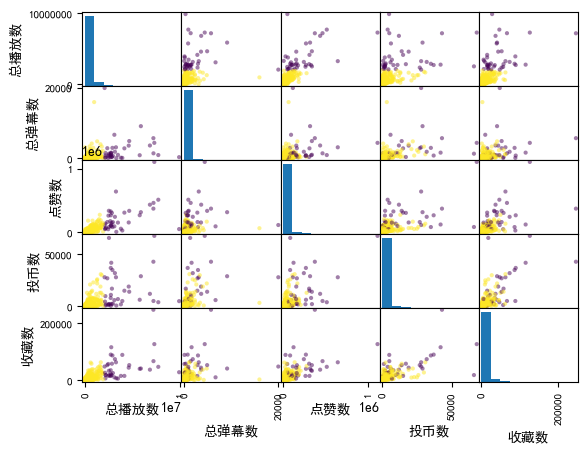

In [18]:
# 使用样本簇编号作为类型标签，绘制特征对的散点图矩阵用不同颜色标识不同的簇
pd.plotting.scatter_matrix(analysis_data, c=kmeans.labels_, diagonal='hist')

<font face="微软雅黑" size=4 color=#A52A2A >观察聚类结果，数据主要依照总播放数分为高低播放量两簇

In [19]:
# 使用轮廓系数（Silhouette Coefficient）来度量聚类的质量

from sklearn import metrics
metrics.silhouette_score(X,kmeans.labels_,metric='euclidean' )

0.8756199310059594

<font face="微软雅黑" size=4 color=#A52A2A >轮廓系数同时考虑聚类结果的簇内凝聚度和簇间分离度，轮廓系数为0.876，较大，说明分为2类聚类的效果较好

Text(0, 0.5, 'Sihouette Coefiicient Score')

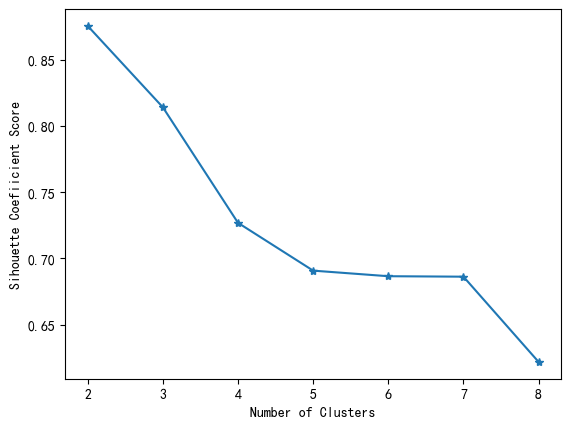

In [20]:
# 尝试多个k值聚类，比较轮廓系数

clusters = [2,3,4,5,6,7,8]
sc_scores = []
# 计算各个簇模型的轮廓系数
for i in clusters:
    kmeans = KMeans( n_clusters = i).fit(X)
    sc = metrics.silhouette_score( X, kmeans.labels_, metric='euclidean' )
    sc_scores.append( sc )
# 绘制曲线图反应轮廓系数与簇数的关系
plt.plot(clusters, sc_scores, '*-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient Score')

<font face="微软雅黑" size=4 color=#A52A2A >当K=2时聚类的轮廓系数最大，分成2类是最合理的